**Sleep Study**

Data collected from a survey-based study of the sleeping habits of individuals within the US. This data was conducted as a pilot study to determine whether or not students were satisfied with the survey.

**Improting Libraries**

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**Reading the data**

In [2]:
df = pd.read_csv('SleepStudyData.csv')

In [3]:
df.head()

,Enough,Hours,PhoneReach,PhoneTime,Tired,Breakfast
0,Yes,8.0,Yes,Yes,3,Yes
1,No,6.0,Yes,Yes,3,No
2,Yes,6.0,Yes,Yes,2,Yes
3,No,7.0,Yes,Yes,4,No
4,No,7.0,Yes,Yes,2,Yes


**PreProcessing**

In [4]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['Enough']= label_encoder.fit_transform(df['Enough'])
df['PhoneReach']= label_encoder.fit_transform(df['PhoneReach'])
df['PhoneTime']= label_encoder.fit_transform(df['PhoneTime'])
df['Breakfast']= label_encoder.fit_transform(df['Breakfast'])


In [5]:
df.describe()

,Enough,Hours,PhoneReach,PhoneTime,Tired,Breakfast
count,104.000000,102.000000,104.000000,104.000000,104.000000,104.000000
mean,0.346154,6.656863,0.692308,0.807692,3.076923,0.605769
std,0.478047,1.417676,0.463774,0.396022,1.011510,0.491051
min,0.000000,2.000000,0.000000,0.000000,1.000000,0.000000
25%,0.000000,6.000000,0.000000,1.000000,2.000000,0.000000
50%,0.000000,7.000000,1.000000,1.000000,3.000000,1.000000
75%,1.000000,7.000000,1.000000,1.000000,4.000000,1.000000
max,1.000000,10.000000,1.000000,1.000000,5.000000,1.000000


**Visualization**

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PhoneTime', ylabel='Density'>

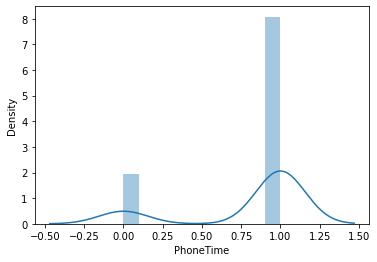

In [6]:
sns.distplot(df['PhoneTime'])

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PhoneReach', ylabel='Density'>

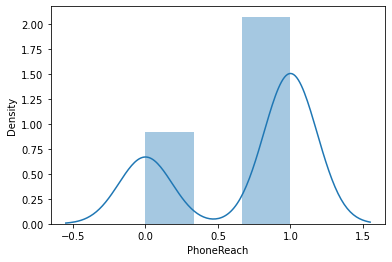

In [7]:
sns.distplot(df['PhoneReach'])

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Enough', ylabel='Density'>

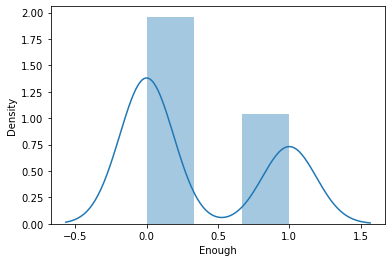

In [8]:
sns.distplot(df['Enough'])

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Tired', ylabel='Density'>

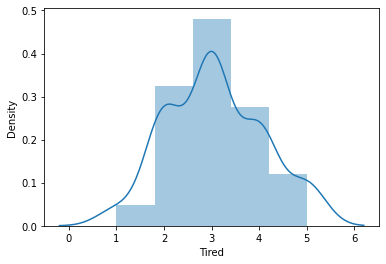

In [9]:
sns.distplot(df['Tired'])

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Hours', ylabel='Density'>

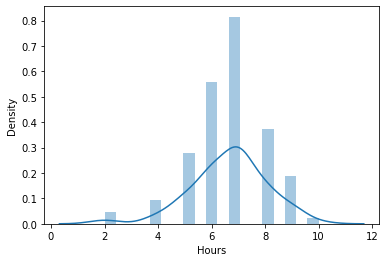

In [10]:
sns.distplot(df['Hours'])

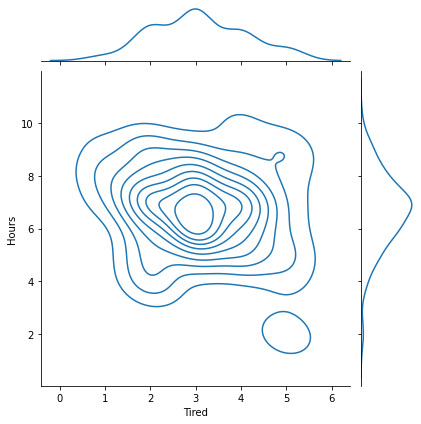

In [11]:
sns.jointplot(x='Tired',y='Hours',data = df,kind = 'kde' )

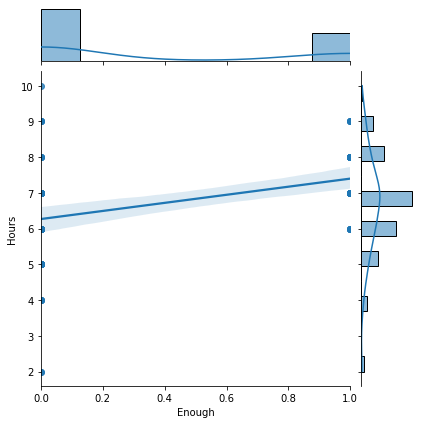

In [12]:
sns.jointplot(x='Enough',y='Hours',data = df,kind = 'reg' )

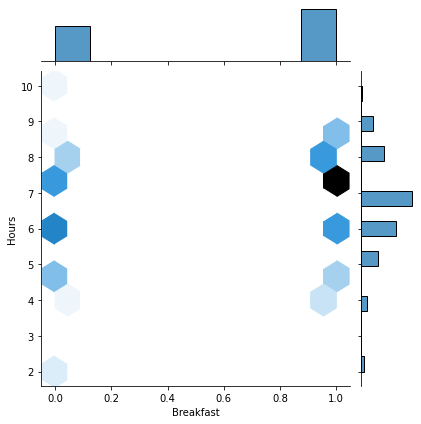

In [13]:
sns.jointplot(x='Breakfast',y='Hours',data = df,kind = 'hex' )

<AxesSubplot:xlabel='Tired', ylabel='Density'>

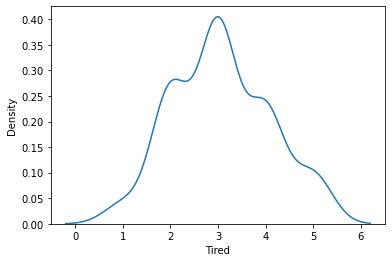

In [14]:
sns.kdeplot(df['Tired'])

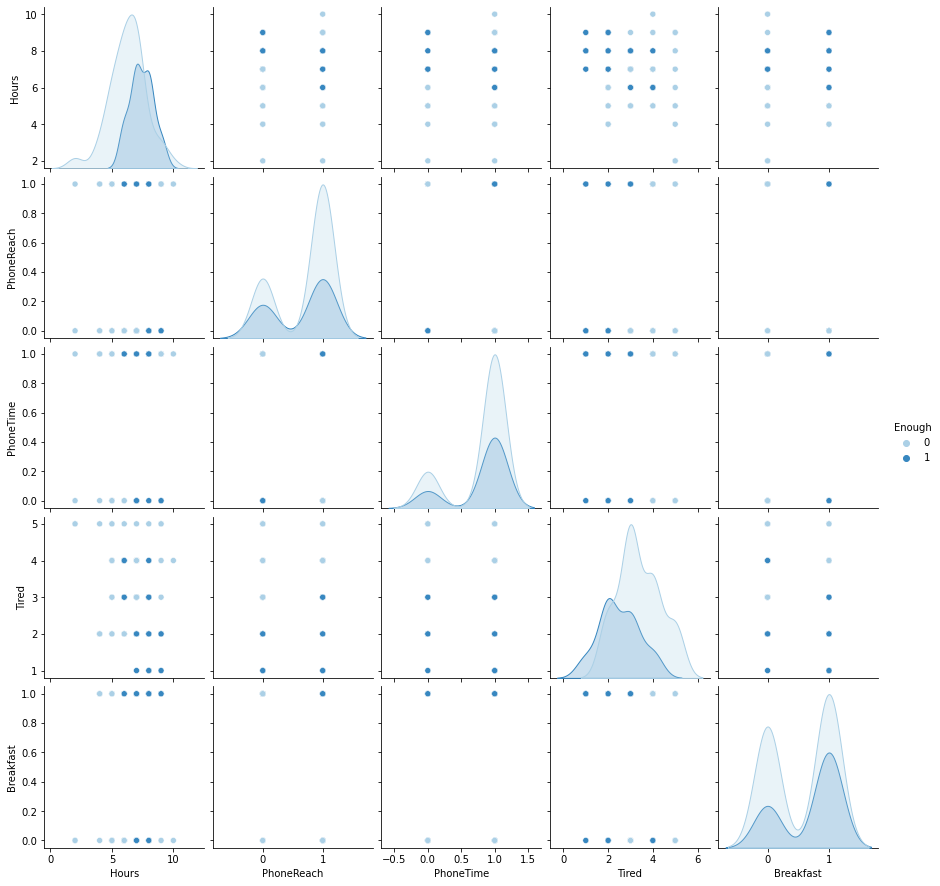

In [15]:
sns.pairplot(df,hue='Enough',palette='Blues')

<AxesSubplot:xlabel='Breakfast', ylabel='Hours'>

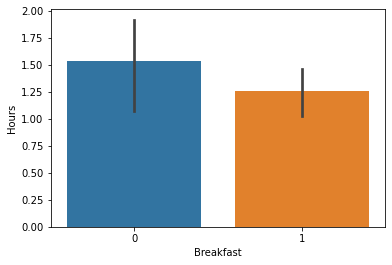

In [16]:
sns.barplot(x='Breakfast',y= 'Hours',data=df,estimator = np.std)

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-p

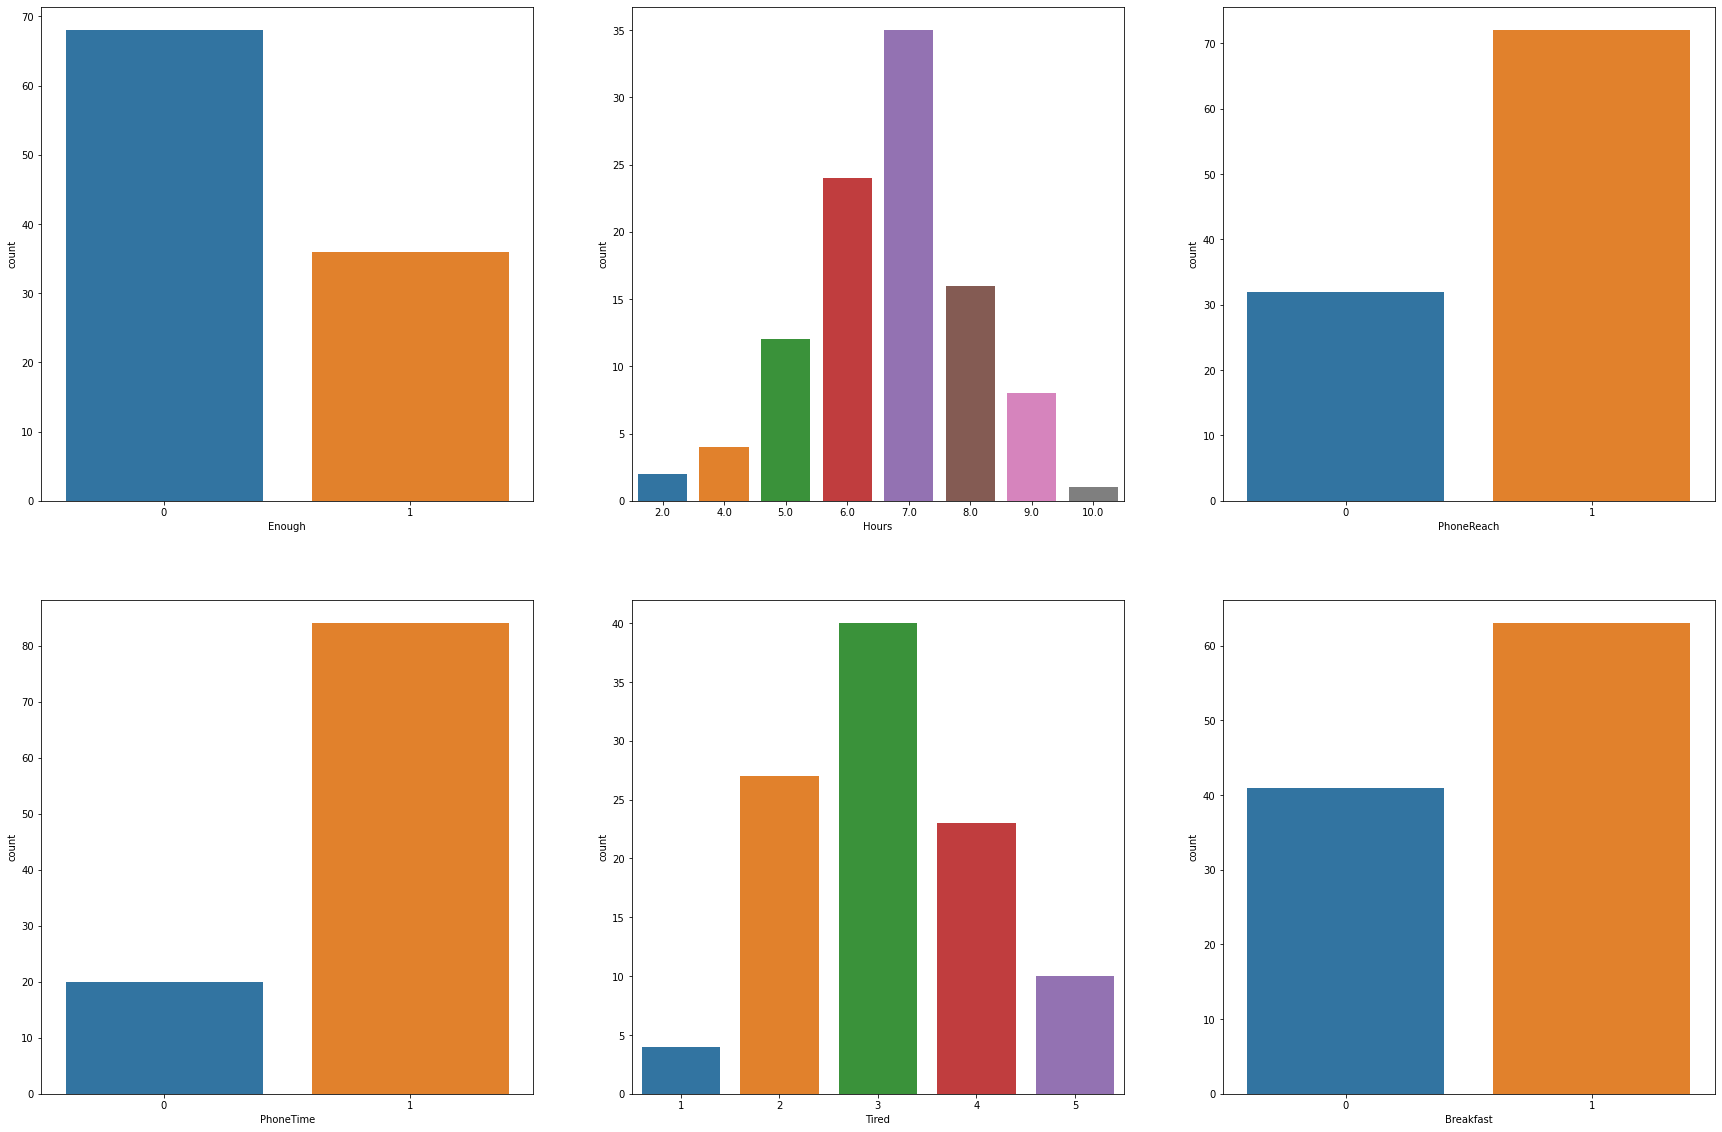

In [17]:
plt.figure(figsize=(30,20))
for i, c in enumerate(df.columns):
    plt.subplot(2,3,i+1)
    sns.countplot(df[c])
plt.show()  

<AxesSubplot:>

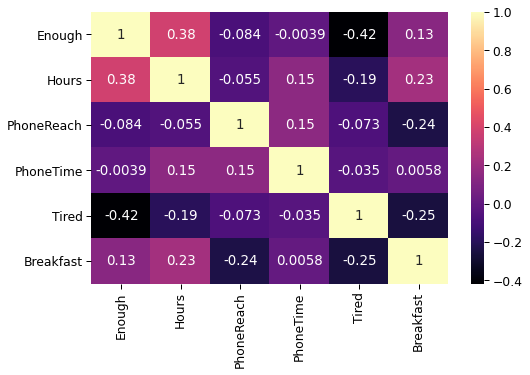

In [18]:
plt.figure(figsize=(8,5))
sns.set_context('paper',font_scale=1.4)
sns.heatmap(df.corr(), annot=True,cmap='magma')

<AxesSubplot:xlabel='Enough', ylabel='Tired'>

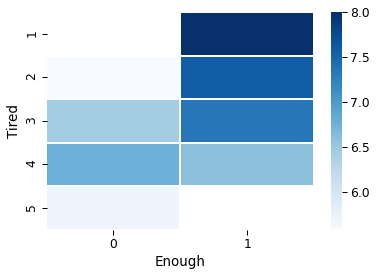

In [19]:
sleep = df.pivot_table(index= 'Tired',columns = 'Enough',values='Hours')
sns.heatmap(sleep,cmap='Blues',linecolor='white',linewidth = 1)

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'CountPlot')

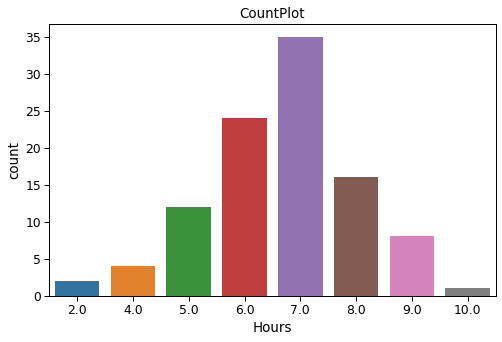

In [20]:
plt.figure(figsize=(8,5))
sns.countplot(df['Hours'])  # Count is No. of people
plt.title('CountPlot')

<AxesSubplot:xlabel='Breakfast', ylabel='Hours'>

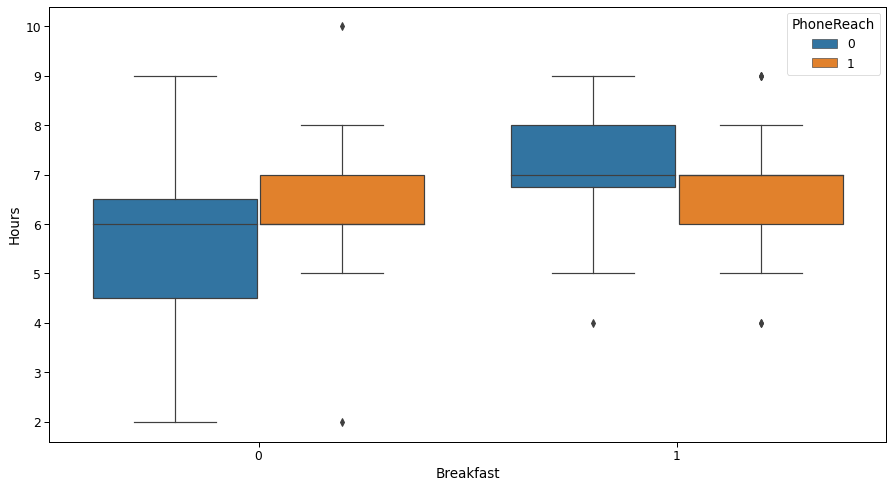

In [21]:
plt.figure(figsize=(15,8))
sns.boxplot(y=df['Hours'], x=df['Breakfast'],hue='PhoneReach', data=df)

<AxesSubplot:xlabel='Tired', ylabel='Hours'>

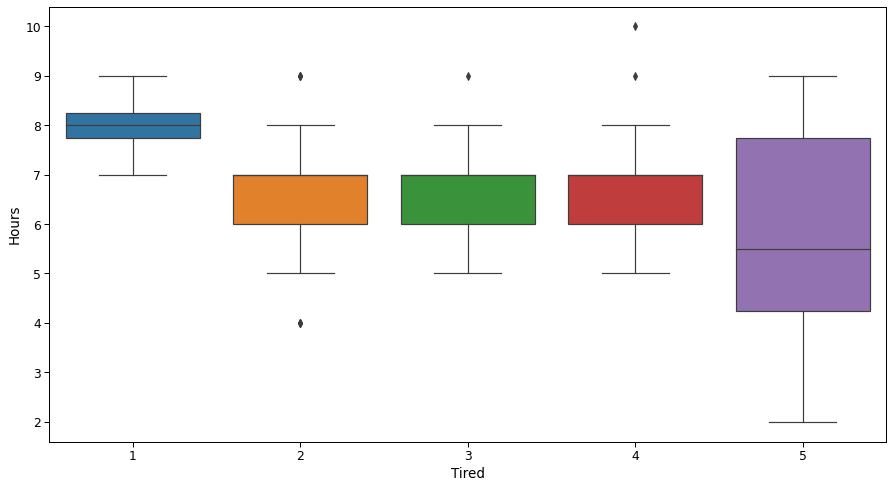

In [22]:
plt.figure(figsize=(15,8))
sns.boxplot(y=df['Hours'], x=df['Tired'], data=df)

<AxesSubplot:xlabel='Hours', ylabel='Tired'>

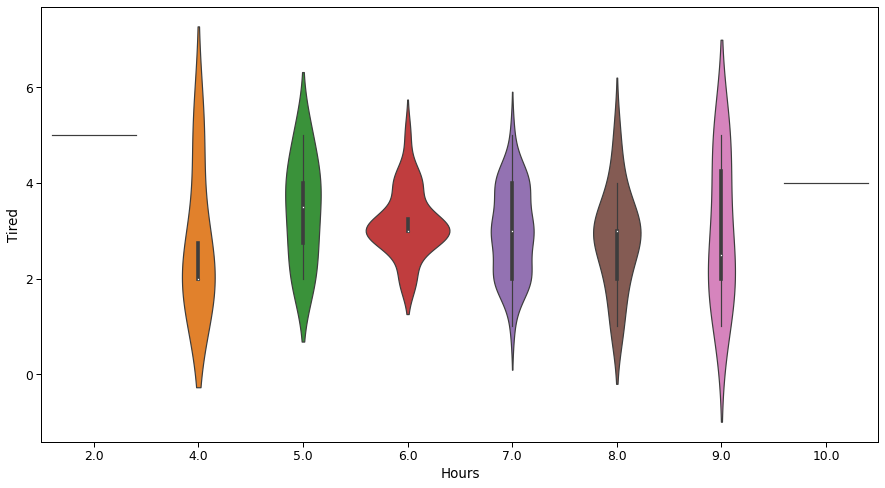

In [23]:
plt.figure(figsize=(15,8))
sns.violinplot(x=df['Hours'], y=df['Tired'], data=df)

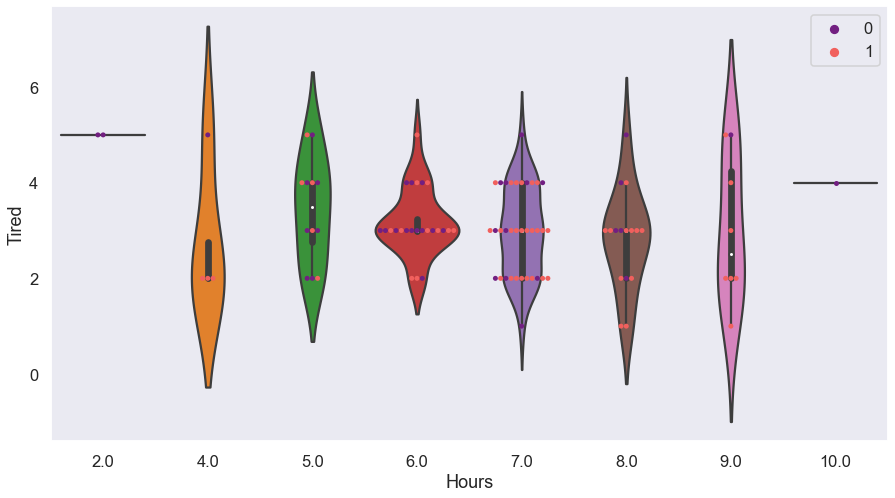

In [24]:
plt.figure(figsize=(15,8))
sns.set_style('dark')
sns.set_context('talk')
sns.violinplot(x=df['Hours'], y=df['Tired'], data=df)
sns.swarmplot(x=df['Hours'],y=df['Tired'],data=df,color='white',hue='Breakfast',palette='magma')
plt.legend(loc=1)

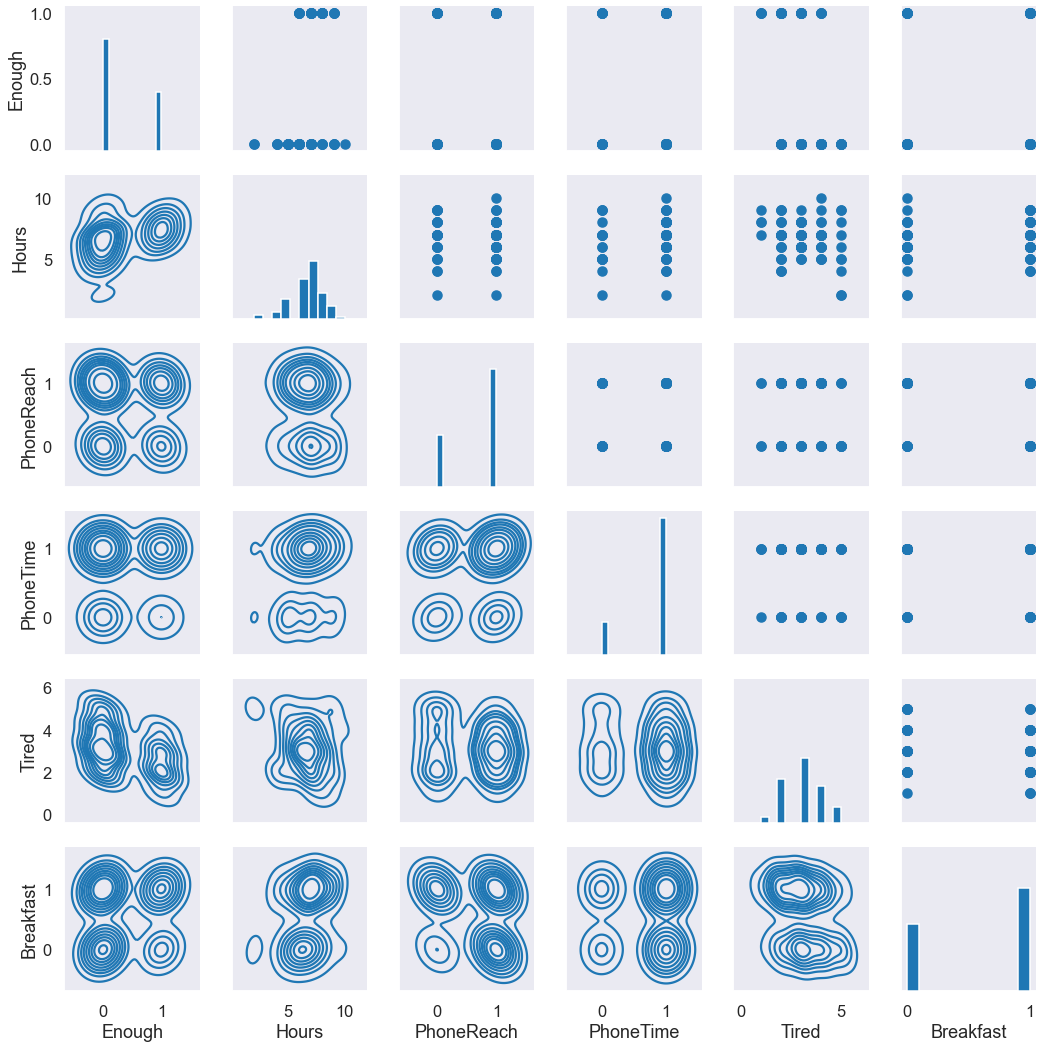

In [25]:
sleep_con = sns.PairGrid(df)
sleep_con.map_diag(plt.hist)
sleep_con.map_upper(plt.scatter)
sleep_con.map_lower(sns.kdeplot)

<Figure size 576x432 with 0 Axes>

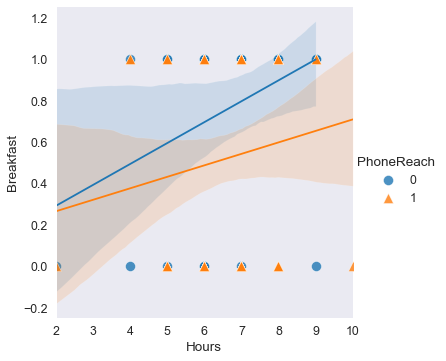

In [26]:
plt.figure(figsize=(8,6))
sns.set_context('paper',font_scale=1.4)
sns.lmplot(x='Hours',y='Breakfast',hue='PhoneReach',data=df,markers =['o','^'],
          scatter_kws={'s':100,'linewidth':0.5,'edgecolor':'white'})